In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5],
                   [3, 0.5], [2, 2], [1, 2.5]])

y_train = np.array([0, 0, 0, 1, 1, 1])

In [3]:
def sigmoid(w: np.ndarray, x_i: np.ndarray, b):
    return 1 / (1 + np.exp(-(np.dot(w, x_i) + b)))

In [4]:
def logistic_loss(y_hat: float, y_i: float):
    '''
    # Logistic's Loss Function
    f(x) = 1 / 1 + e^(-z)
    L(f(x), y^(i)) = -y^(i) * log(f(x)) - (1 - y^(i))log(1 - f(x))
    '''
    return -y_i * np.log(y_hat) - (1 - y_i) * np.log(1 - y_hat)

In [5]:
def logistic_cost(x: np.ndarray, y: np.ndarray, w: np.ndarray, b: float):
    '''
    # Cost Function
    J(w, b) = 1/m * sum(L(f, y^(i)))
    '''
    sum = 0
    m = x.shape[0]
    for i in range(m - 1):
        f = sigmoid(w, x[i], b)
        sum += logistic_loss(f, y[i])

    return sum / m

### Define dj/dw and dj/db

In [6]:
def logistic_derivatives(x: np.ndarray, y: np.ndarray, w: np.ndarray, b: float):
    m, n = x.shape
    
    dj_dw = 0
    dj_db = 0

    for i in range(m - 1):
        
        f = sigmoid(w, x[i], b) 
        
        for j in range(n):
            dj_dw += (f - y[i]) * x[i][j]
        
        dj_db += (f - y[i])

    return (dj_dw / m, dj_db / m)
    

In [7]:
w = np.zeros(2)
b = 0.0
a = 0.1

cost_hist = np.zeros(0)

In [8]:
for i in range(10_000):
   dj_dw, dj_db = logistic_derivatives(X_train, y_train, w, b)
   w -= a * dj_dw
   b -= a * dj_db
   if((i % 1000) == 0):
      j = logistic_cost(X_train, y_train, w, b)
      cost_hist = np.append(cost_hist, j)
      print("Iteration",i,"Cost:", j)

Iteration 0 Cost: 0.575445364021209
Iteration 1000 Cost: 0.13349773060430928
Iteration 2000 Cost: 0.07142692793158488
Iteration 3000 Cost: 0.048471490977568595
Iteration 4000 Cost: 0.03663245085150628
Iteration 5000 Cost: 0.029429285328285423
Iteration 6000 Cost: 0.024590194250432847
Iteration 7000 Cost: 0.021117140864857744
Iteration 8000 Cost: 0.018503882432804635
Iteration 9000 Cost: 0.01646656660214905


In [9]:
w, b

(array([4.96046445, 4.96046445]), -13.904547309312196)

In [10]:
cost_hist.size

10

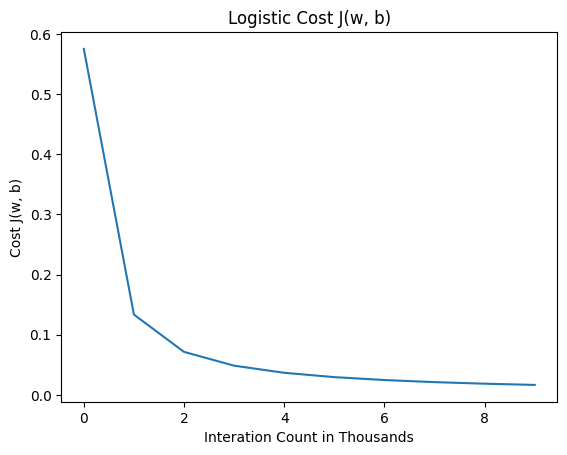

In [11]:
plt.plot(cost_hist)
plt.title("Logistic Cost J(w, b)")
plt.xlabel("Interation Count in Thousands")
plt.ylabel("Cost J(w, b)")
plt.xticks(np.arange(0, cost_hist.size, 2))
plt.show()